In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 使用Seaborn的默认样式
sns.set(style="whitegrid")


In [78]:
# 获取所有CSV文件的路径
csv_files = glob.glob('algorithm_run_times3.csv')

# 读取所有CSV文件并合并成一个DataFrame
data_frames = [pd.read_csv(file) for file in csv_files]
all_data = pd.concat(data_frames, ignore_index=True)


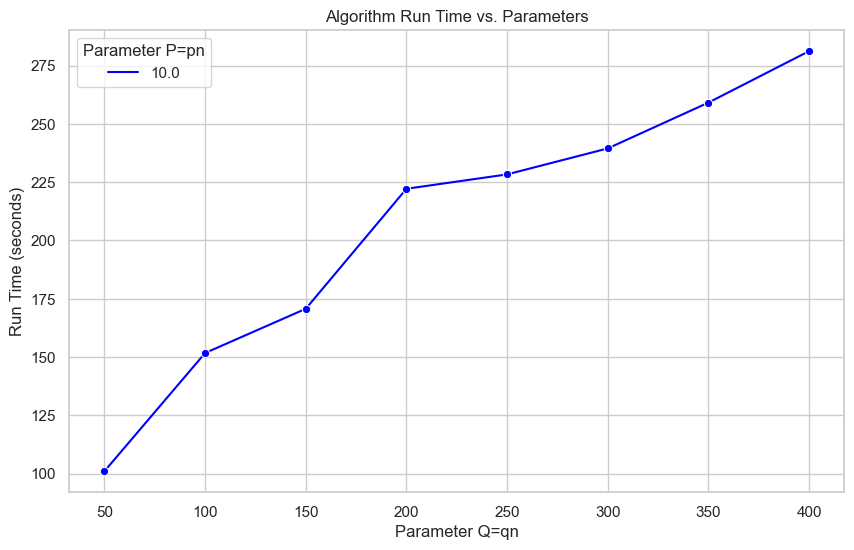

In [79]:
# 绘制运行时间随参数变化的折线图
#custom_palette = sns.color_palette([ "#0000FF"])
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='param2', y='run_time', marker='o',hue='param1',palette=custom_palette )


plt.title('Algorithm Run Time vs. Parameters')
plt.xlabel('Parameter Q=qn')
plt.ylabel('Run Time (seconds)')
plt.legend(title='Parameter P=pn')
plt.grid(True)
plt.show()




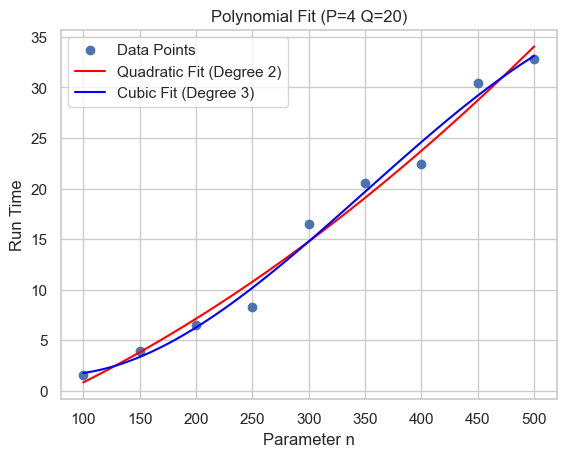

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial


data = {
    'x': [100,150, 200, 250,300,350, 400, 450,500],
    'y': [1.54, 3.89,6.46, 8.25,16.46,20.52, 22.44,30.49 ,32.86]
}
df = pd.DataFrame(data)
x = df['x']
y = df['y']

# 拟合二次多项式
poly2 = np.polyfit(x, y, 2)
p2 = np.poly1d(poly2)

# 拟合三次多项式
poly3 = np.polyfit(x, y, 3)
p3 = np.poly1d(poly3)


# 创建一个x的连续值范围，用于绘制平滑曲线
x_vals = np.linspace(min(x), max(x), 100)

# 绘制原始数据点
plt.scatter(x, y, label='Data Points')

# 绘制二次多项式拟合曲线
plt.plot(x_vals, p2(x_vals), label='Quadratic Fit (Degree 2)', color='red')

# 绘制三次多项式拟合曲线
plt.plot(x_vals, p3(x_vals), label='Cubic Fit (Degree 3)', color='blue')

# 添加图表标题和标签
plt.title('Polynomial Fit (P=4 Q=20)')
plt.xlabel('Parameter n')
plt.ylabel('Run Time')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
# 计算二次多项式的RSS
rss2 = np.sum((y - p2(x)) ** 2)

# 计算三次多项式的RSS
rss3 = np.sum((y - p3(x)) ** 2)

print(f'RSS for quadratic fit (degree 2): {rss2}')
print(f'RSS for cubic fit (degree 3): {rss3}')
n = len(y)  # 数据点数量
k2 = 3  # 二次多项式的参数数量（包括常数项）
k3 = 4  # 三次多项式的参数数量（包括常数项）

# 计算AIC
aic2 = n * np.log(rss2 / n) + 2 * k2
aic3 = n * np.log(rss3 / n) + 2 * k3

# 计算BIC
bic2 = n * np.log(rss2 / n) + np.log(n) * k2
bic3 = n * np.log(rss3 / n) + np.log(n) * k3

print(f'AIC for quadratic fit (degree 2): {aic2}')
print(f'AIC for cubic fit (degree 3): {aic3}')
print(f'BIC for quadratic fit (degree 2): {bic2}')
print(f'BIC for cubic fit (degree 3): {bic3}')


RSS for quadratic fit (degree 2): 18.499771168831153
RSS for cubic fit (degree 3): 14.114425613275602
AIC for quadratic fit (degree 2): 12.484804068772707
AIC for cubic fit (degree 3): 12.049755111664282
BIC for quadratic fit (degree 2): 13.076477800781365
BIC for cubic fit (degree 3): 12.83865342100916


In [65]:
# 获取所有CSV文件的路径
csv_files = glob.glob('C:/Users/lilingrui/*.csv')

# 创建一个空的DataFrame来保存所有数据
all_data = pd.DataFrame()

# 循环读取每个CSV文件并合并数据
for file in csv_files:
    data = pd.read_csv(file)
    all_data = pd.concat([all_data, data], ignore_index=True)
    #print(data)

# 检查数据
print(all_data)


    param1  param2    run_time
0     50.0   500.0  733.196128
1    100.0   500.0  445.645827
2    150.0   500.0  561.639573
3    200.0   500.0  580.939072
4    250.0   500.0  603.500616
5     10.0   100.0  118.948343
6     20.0   100.0  124.267160
7     30.0   100.0  118.900845
8     40.0   100.0  113.000519
9     50.0   100.0  199.734241
10    20.0   200.0  239.745313
11    40.0   200.0  363.953965
12    60.0   200.0  405.097180
13    80.0   200.0  416.416398
14    10.0    50.0  101.086311
15    10.0   100.0  151.754596
16    10.0   150.0  170.714130
17    10.0   200.0  222.163780
18    10.0   250.0  228.330072
19    10.0   300.0  239.463655
20    10.0   350.0  259.105346
21    10.0   400.0  281.167258
22     5.0    50.0   91.451859
23    10.0    50.0   95.596093
24    15.0    50.0  116.889812
25    20.0    50.0  109.333678
26    25.0    50.0  181.741259
27     2.0    20.0   58.136256
28     4.0    20.0   51.349683
29     6.0    20.0   53.998047
30     8.0    20.0   63.370229
31    10

   param1  param2    run_time
0    50.0   500.0  733.196128
1   100.0   500.0  445.645827
2   150.0   500.0  561.639573
3   200.0   500.0  580.939072
4   250.0   500.0  603.500616


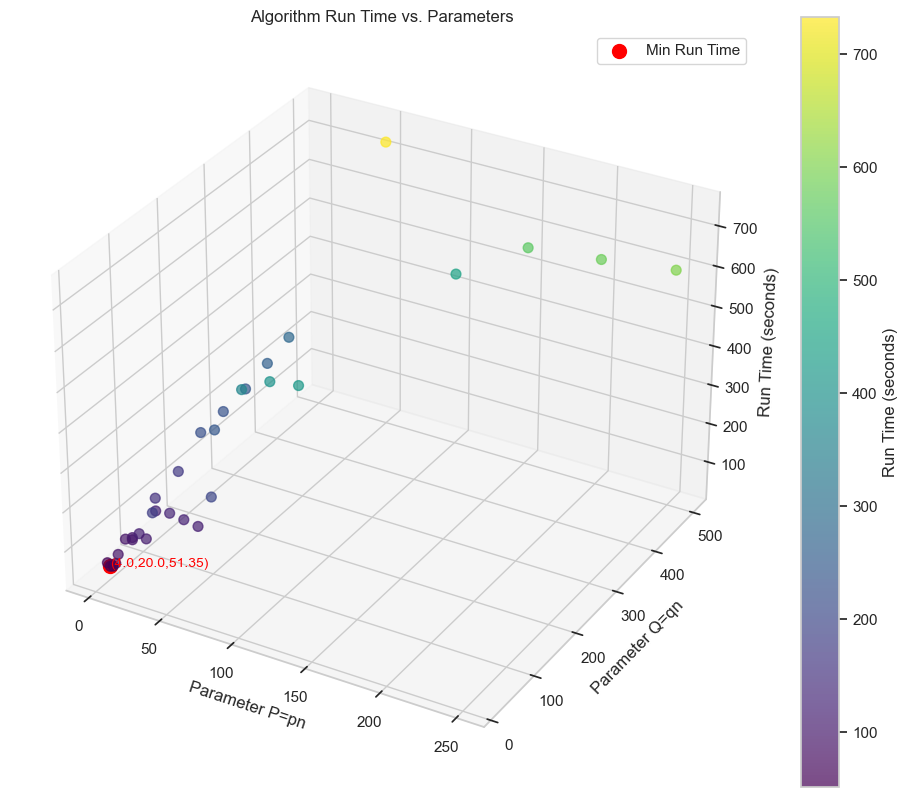

In [66]:


# 检查是否成功读取了任何数据
if all_data.empty:
    print("No data read. Please check file paths and formats.")
else:
    # 检查数据
    print(all_data.head())

    # 绘制三维图
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # 使用颜色渐变和大小来表示运行时间
    scatter = ax.scatter(all_data['param1'], all_data['param2'], all_data['run_time'], 
                         c=all_data['run_time'], cmap='viridis', s=50, alpha=0.7)
    fig.colorbar(scatter, ax=ax, label='Run Time (seconds)')

    # 找到运行时间最小的几个点
    min_run_times = all_data.nsmallest(1, 'run_time')

    # 标记最小运行时间的点
    ax.scatter(min_run_times['param1'], min_run_times['param2'], min_run_times['run_time'], 
               c='red', s=100, label='Min Run Time')

    # 添加标签
    for i, row in min_run_times.iterrows():
        ax.text(row['param1'], row['param2'], row['run_time'], f'({row["param1"]},{row["param2"]},{row["run_time"]:.2f})',
                color='red', fontsize=10)

    # 设置图表标题和轴标签
    ax.set_title('Algorithm Run Time vs. Parameters')
    ax.set_xlabel('Parameter P=pn')
    ax.set_ylabel('Parameter Q=qn')
    ax.set_zlabel('Run Time (seconds)')
    ax.legend()

    # 显示图表
    plt.show()
